In [58]:
#!pip install yfinance

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

%matplotlib inline
plt.style.use('seaborn-darkgrid')

**1) Extracting S&P 500 Stock List** <br>
Source from wikipedia

In [60]:
#source from wiki
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

SP500_full = pd.read_html(url)[0]

In [61]:
SP500_full.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981


In [62]:
#Extracting only the ticker list
SP500_ticker = SP500_full['Symbol'].tolist()

In [63]:
#parsing tickers to list, remove special characters
SP500_ticker = [ticker.replace(".","-") for ticker in SP500_ticker]

**2) Retrieving Historic Data** <br>

In [64]:
tickers = ['UL', 'PG', 'CL', 'KMB']

In [65]:
price_data = yf.download(tickers, start="2022-01-02")['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [66]:
price_data.head()

,CL,KMB,PG,UL
Date,,,,
2022-01-03,84.132973,142.429993,162.025162,53.549786
2022-01-04,84.411469,143.199997,162.592102,53.292236
2022-01-05,84.759575,144.059998,163.328140,53.193180
2022-01-06,84.202599,143.119995,161.955536,52.668182
2022-01-07,83.983788,143.740005,161.866028,53.292236


**3) Plotting - Same Size Comparison** <br>
For visualising the price of different assets, to make them comparable,  divide the entire price series by its respective first price value. This will make the changes comparable. 

Hence, one way is to divide it by the first price so that we can compare them on the same scale. This helps us to compare stocks with different price basis.

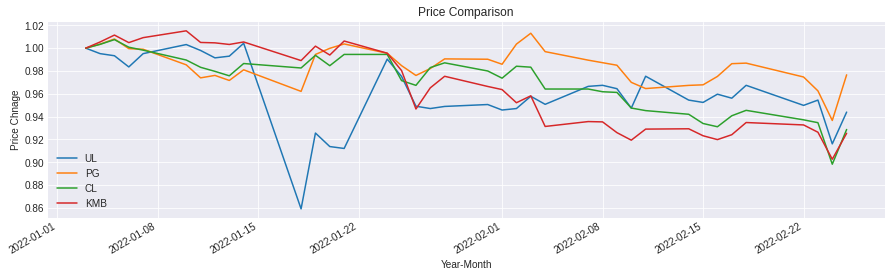

In [67]:
# Plot the absolute price series
plt.figure(figsize=(15,4))
(price_data['UL']/price_data['UL'].iloc[0]).plot()
(price_data['PG']/price_data['PG'].iloc[0]).plot()
(price_data['CL']/price_data['CL'].iloc[0]).plot()
(price_data['KMB']/price_data['KMB'].iloc[0]).plot()

# Set the title and axes label
plt.title('Price Comparison', fontsize=12)
plt.xlabel('Year-Month', fontsize=10)
plt.ylabel('Price Chnage', fontsize=10)
plt.legend()
plt.show()

**4) Working with Minute Intervals/ Re-sampling to Hour or Day** <br>
With resampling technique to aggregate. Only high frequency data can be aggregated into Hourly/ Daily data

In [68]:
# UVXY intraday trend
UVXY = yf.download('UVXY', period='5d', interval='1m', auto_adjust=True)
UVXY.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Datetime,,,,,
2022-02-18 09:30:00-05:00,16.6600,16.7423,16.639999,16.680000,3848426
2022-02-18 09:31:00-05:00,16.6700,16.7300,16.531000,16.660000,338119
2022-02-18 09:32:00-05:00,16.6500,16.6700,16.589800,16.670000,293449
2022-02-18 09:33:00-05:00,16.6700,16.9000,16.660000,16.879999,1084198
2022-02-18 09:34:00-05:00,16.8806,17.0100,16.820000,17.010000,492703


Define conversion logic with dictionary. 

In [69]:
# Aggregate function
conv_dict = {'Open': 'first',
              'High': 'max',
              'Low': 'min',
              'Close': 'last',
              'Volume': 'sum'
             }

In [70]:
# Resample data to 15 minutes data
UVXY_15min = UVXY.resample('15T').agg(conv_dict)
UVXY_15min.dropna(inplace=True)
UVXY_15min.head()

,Open,High,Low,Close,Volume
Datetime,,,,,
2022-02-18 09:30:00-05:00,16.660000,17.170000,16.531000,17.105000,9641957
2022-02-18 09:45:00-05:00,17.100000,17.139999,16.309999,16.410000,5382373
2022-02-18 10:00:00-05:00,16.410000,16.879999,16.379999,16.705000,4027740
2022-02-18 10:15:00-05:00,16.709999,16.980000,16.490000,16.899000,3967804
2022-02-18 10:30:00-05:00,16.895000,17.219999,16.889999,16.995001,4450372


**5) Retrieving FOREX Data** <br>
From yahoo finance with yfinance package. e.g. EUR/USD forex data, parse `EURUSD=X` as the ticker. Reference - [Yahoo! Finance](https://finance.yahoo.com/currencies/).

In [71]:
# Set the ticker
forex_data = yf.download('GBPHKD=X', start='2022-01-01')
forex_data.index = pd.to_datetime(forex_data.index)
forex_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,10.54051,10.54915,10.47379,10.54087,10.54087,0
2022-01-04,10.51204,10.56532,10.49180,10.51275,10.51275,0
2022-01-05,10.54381,10.58040,10.53760,10.54412,10.54412,0
2022-01-06,10.56544,10.57556,10.52349,10.56470,10.56470,0
2022-01-07,10.55670,10.59113,10.55346,10.55611,10.55611,0


**6) Plotting FOREX Chart down to minute data**

In [72]:
# Set the ticker as 'EURUSD=X'
forex_data_minute = yf.download('EURUSD=X', period='5d', interval='1m')

# Set the index to a datetime object
forex_data_minute.index = pd.to_datetime(forex_data_minute.index)
forex_data_minute.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-02-21 00:00:00+00:00,1.131862,1.131862,1.131862,1.131862,1.131862,0
2022-02-21 00:01:00+00:00,1.131862,1.131862,1.131862,1.131862,1.131862,0
2022-02-21 00:02:00+00:00,1.131734,1.131734,1.131734,1.131734,1.131734,0
2022-02-21 00:03:00+00:00,1.131990,1.131990,1.131990,1.131990,1.131990,0
2022-02-21 00:04:00+00:00,1.131862,1.131862,1.131862,1.131862,1.131862,0


In [73]:
# define function to format x-label of graph
def format_xlabels(data, ax):
    num_x_values = data.shape[0]
    step_size = num_x_values // 4    

    ax.set_xticks(np.arange(num_x_values))
    ax.set_xticklabels(data.index.values, rotation=45)
   
    for i, label in enumerate(ax.get_xticklabels()):
        if not i%step_size==0:
            label.set_visible(False)  
    label.set_visible(True)

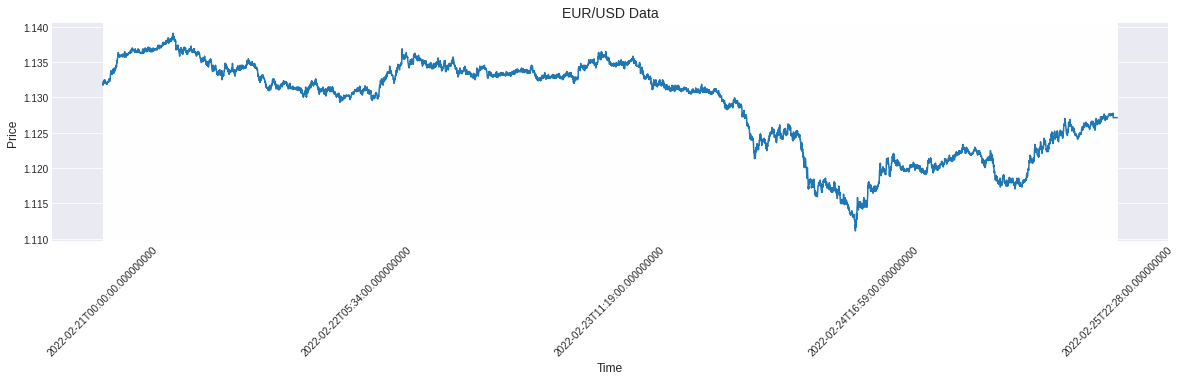

In [74]:
# Number of points to plot
x_values = forex_data_minute['Adj Close'].shape[0]

# Plot the series
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(range(x_values), forex_data_minute['Adj Close'])

# Set title and axis label
plt.title('EUR/USD Data', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Format the xlabel
format_xlabels(forex_data_minute['Adj Close'], ax)

# Show the plot
plt.show()

**7) Retrieving Futures Data** <br>
https://finance.yahoo.com/lookup/ 

In [75]:
# Gold Apr 22 future (GC=F)
goldapr22 = yf.download('GC=F', start='2022-01-01', end='2022-02-27')

[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'Price in USD')

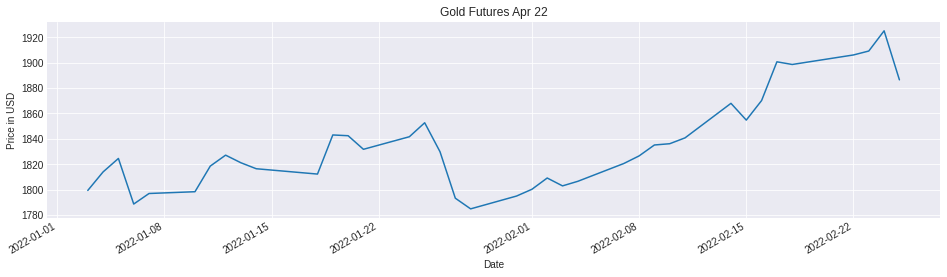

In [76]:
# Plot the adjusted close price
(goldapr22['Adj Close']).plot(figsize=(16, 4))
plt.title('Gold Futures Apr 22')
plt.ylabel('Price in USD')

**8) Working with Option Chains**

In [77]:
# identifying option dates available for a ticker
UVXY = yf.Ticker('UVXY')

# Call the options on the ticker to get available expiry dates
UVXY.options

('2022-03-04',
 '2022-03-11',
 '2022-03-18',
 '2022-03-25',
 '2022-04-01',
 '2022-04-14',
 '2022-05-20',
 '2022-06-17',
 '2022-09-16',
 '2023-01-20',
 '2023-02-17',
 '2024-01-19')

In [78]:
# retrieving option chain data
uvxy_option_chain = UVXY.option_chain(date=UVXY.options[0])

# add calls/puts to make sure right data is retrieved
uvxy_option_chain.puts.tail( )

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
40,UVXY220304P00031000,2022-02-24 17:15:35+00:00,31.0,11.23,13.15,16.05,0.000000,0.000000,20,72,5.359378,True,REGULAR,USD
41,UVXY220304P00032000,2022-02-25 16:02:31+00:00,32.0,15.35,14.50,16.55,-1.799999,-10.495623,50,6,4.738285,True,REGULAR,USD
42,UVXY220304P00034000,2022-02-17 20:12:17+00:00,34.0,18.40,16.30,18.60,0.000000,0.000000,8,255,5.074222,True,REGULAR,USD
43,UVXY220304P00035000,2022-02-25 20:52:14+00:00,35.0,18.55,18.25,19.20,1.349999,7.848828,19,33,3.070315,True,REGULAR,USD
44,UVXY220304P00040000,2022-02-25 20:37:26+00:00,40.0,23.62,22.05,24.45,4.400002,22.892828,2,5,5.457034,True,REGULAR,USD


Text(0, 0.5, 'Last Price')

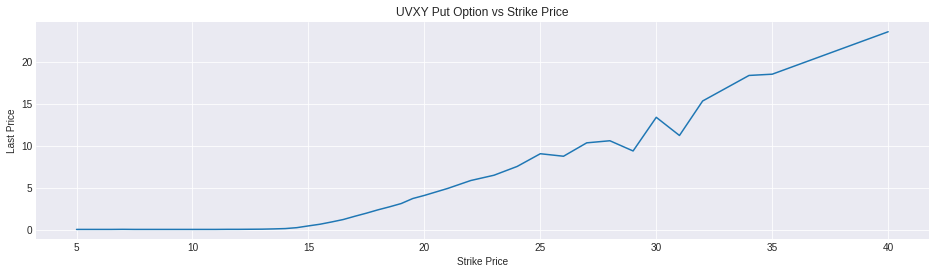

In [79]:
# Plot call strike price vs put last traded price 
plt.figure(figsize=(16, 4))
plt.plot(option_chain.puts.strike, option_chain.puts.lastPrice)
plt.title('UVXY Put Option vs Strike Price')
plt.xlabel('Strike Price')
plt.ylabel('Last Price')

**9) Getting Analyst Ratings & Dividends**

In [80]:
# Set object for ticker to be fetched
realtyincome = 'O'
stock_ticker = yf.Ticker(realtyincome)

In [81]:
# Analyst recommendations
analyst_recommendations = stock_ticker.get_recommendations()

# Print the last 10 recommendations
analyst_recommendations.tail(10)

,Firm,To Grade,From Grade,Action
Date,,,,
2021-06-03 12:34:30,Mizuho,Buy,Neutral,up
2021-06-03 14:17:26,Morgan Stanley,Overweight,,main
2021-06-15 11:01:55,Wolfe Research,Peer Perform,,init
2021-06-17 11:26:52,Raymond James,Outperform,,main
2021-08-24 12:08:49,Mizuho,Buy,,main
2021-09-17 09:34:00,RBC Capital,Outperform,,init
2021-11-03 12:49:20,RBC Capital,Outperform,,main
2021-11-30 13:08:15,Mizuho,Buy,,main
2021-12-03 13:38:44,Morgan Stanley,Overweight,,main


Last 10 corporate actions 
            Dividends  Stock Splits
Date                               
2021-05-28   0.227713         0.000
2021-06-30   0.228682         0.000
2021-07-30   0.228682         0.000
2021-08-31   0.228682         0.000
2021-09-30   0.228682         0.000
2021-11-01   0.228682         0.000
2021-11-15   0.000000         1.032
2021-11-30   0.246000         0.000
2021-12-31   0.247000         0.000
2022-01-31   0.247000         0.000


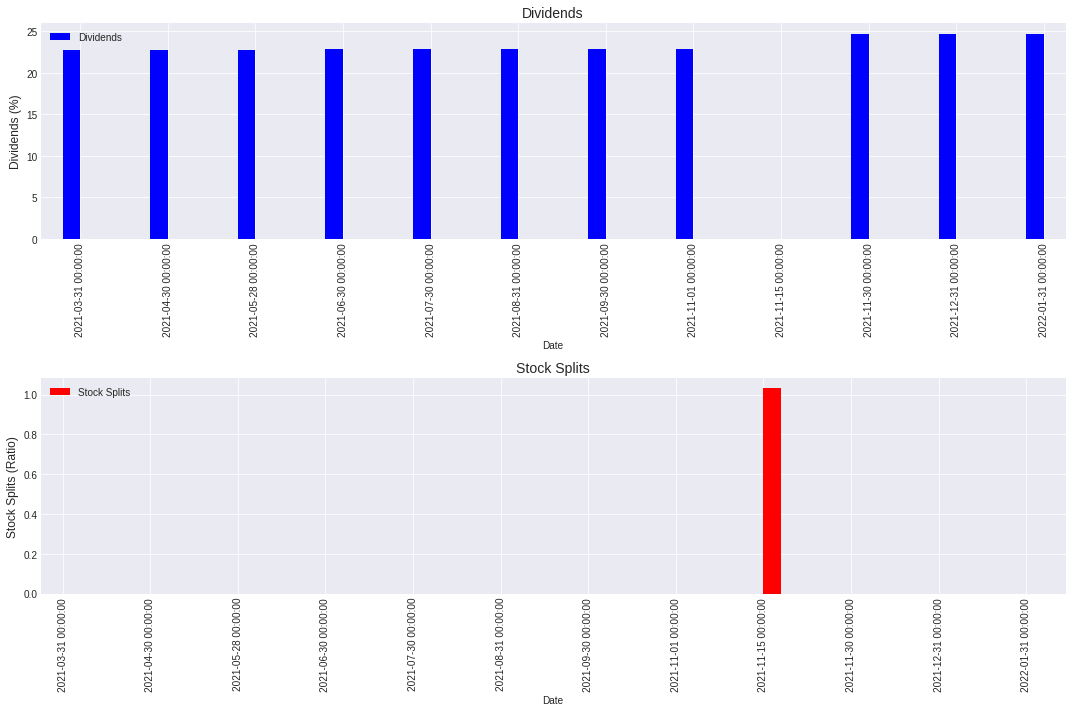

In [83]:
# Corporate actions
corporate_actions = stock_ticker.get_actions()

# Print the last 10 corporate actions
print(f"Last 10 corporate actions \n{corporate_actions.tail(10)}")

# Plot the net income and revenue for the last 3 years
data_to_plot = corporate_actions.tail(12)

# Define the plot figure
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
width = 0.2

# Plot the data
(data_to_plot['Dividends'] * 100).plot(kind='bar', color='blue', ax=ax1, width=width, position=1)
data_to_plot['Stock Splits'].plot(kind='bar', color='red', ax=ax2, width=width, position=0)

# Set title and labels for the plot
ax1.set_ylabel('Dividends (%)', fontsize=12)
ax2.set_ylabel('Stock Splits (Ratio)', fontsize=12)
ax1.set_title('Dividends', fontsize=14)
ax2.set_title('Stock Splits', fontsize=14)
ax1.legend(loc=2)
ax2.legend(loc=2)
plt.tight_layout()
plt.show()

**10) Retrieving Stock News/ Articles** <br>
from google news

In [ ]:
#!pip install GoogleNews

In [87]:
from GoogleNews import GoogleNews
googlenews = GoogleNews()

In [89]:
# Define keywards for search
keywords = ['Realty Income', 'Realty Income Dividend', 'O', 'REIT']
googlenews.set_time_range('12/01/2021', '01/03/2022')

In [90]:
# Dataframe to store the news article information
article_info = pd.DataFrame(columns=['Date', 'Time', 'Title', 'Articles', 'Link'])

# Gathering all the data of the current page to one dataframe
def newsfeed(article_info, raw_dictionary):
    for i in range(len(raw_dictionary)-1):
        if raw_dictionary is not None:
            # Fetch the date and time and convert it into datetime format
            date = raw_dictionary[i]['datetime']
            date = pd.to_datetime(date)
            # Fetch the title, time, description and source of the news articles
            title = raw_dictionary[i]['title']
            time = raw_dictionary[i]['date']
            articles = raw_dictionary[i]['desc']
            link = raw_dictionary[i]['link']
            # Append all the above information in a single dataframe
            article_info = article_info.append({'Date': date, 'Time': time, 'Title': title,
                            'Articles': articles, 'Link': link}, ignore_index=True)
        else:
            break

    return article_info

In [93]:
# Dataframe containing the news of all the keywords searched
articles = pd.DataFrame()

# Each keyword will be searched seperately and results will be saved in a dataframe
for steps in range(len(keywords)):
    string = (keywords[steps])
    googlenews.search(string)

    # Fetch the results
    result = googlenews.results()

    # Number of pages up to which you want to fetch news articles
    total_pages = 1

    for steps in range(total_pages):
        # Variable consists of pages specified by user so using "for loop" to retrieve all the data in dataframe
        googlenews.get_page(steps)
        feed = newsfeed(article_info, result)
        
    articles = articles.append(feed)

    # Clear off the search results of previous keyword to avoid duplication
    googlenews.clear()

shape = articles.shape[0]

In [94]:
# Resetting the index of the final result
articles.index = np.arange(shape)
articles.tail()

,Date,Time,Title,Articles,Link
71,2021-12-13,"Dec 13, 2021",Retirees in search of income and some inflatio...,REITs generate revenue through their propertie...,https://www.cnbc.com/2021/12/13/real-estate-in...
72,2021-12-21,"Dec 21, 2021",Investing in Infrastructure REITs,Infrastructure real estate investment trusts (...,https://www.fool.com/investing/stock-market/ma...
73,2021-12-23,"Dec 23, 2021",Power REIT Obtains $20 Million Debt Financing ...,Power REIT expects to use the Debt Facility pr...,https://www.globenewswire.com/news-release/202...
74,2021-12-06,"Dec 6, 2021",CareTrust REIT Reportedly Mulling Strategic Op...,"The San Clemente, California-based real estate...",https://seniorhousingnews.com/2021/12/06/caret...
75,2021-12-10,"Dec 10, 2021",Sabra Health Care: This 8.8% Yield REIT Is Tra...,REIT stocks have taken a beating recently due ...,https://seekingalpha.com/article/4474604-sabra...
